<a href="https://colab.research.google.com/github/BrenoMilagres/modelo_preditivo_brasileirao/blob/main/modeloPreditivoCampBrasileiroTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#importando os dados para o google colab
from google.colab import files
uploaded = files.upload()

Saving campeonato-brasileiro-full.csv to campeonato-brasileiro-full.csv


# Carregando, explorando e tratando os Dados

In [ ]:
times = pd.read_csv('campeonato-brasileiro-full.csv')

In [ ]:
times.head()

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


In [ ]:
times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Horário                7582 non-null   object
 1   Dia                    7939 non-null   object
 2   Data                   7939 non-null   object
 3   Clube 1                7939 non-null   object
 4   Clube 2                7939 non-null   object
 5   Vencedor               7939 non-null   object
 6   Rodada                 7939 non-null   object
 7   Arena                  7939 non-null   object
 8   Clube 1 Gols           7939 non-null   int64 
 9   Clube 2 Gols           7939 non-null   int64 
 10  Clube 1 Estado         7939 non-null   object
 11  Clube 2 Estado         7939 non-null   object
 12  Estado Clube Vencedor  7939 non-null   object
dtypes: int64(2), object(11)
memory usage: 806.4+ KB


#### Renomeando colunas

In [ ]:
times = times.rename(columns={'Clube 1':'Mandante','Clube 2':'Visitante','Clube 1 Gols':'MandanteGols','Clube 2 Gols':'VisitanteGols'})
times.head()


,Horário,Dia,Data,Mandante,Visitante,Vencedor,Rodada,Arena,MandanteGols,VisitanteGols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


In [ ]:
times.describe()

,MandanteGols,VisitanteGols
count,7939.000000,7939.000000
mean,1.596801,1.052526
std,1.251372,1.039719
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,7.000000,7.000000


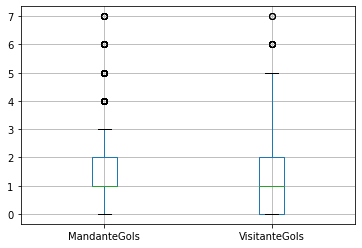

In [ ]:
times.boxplot()

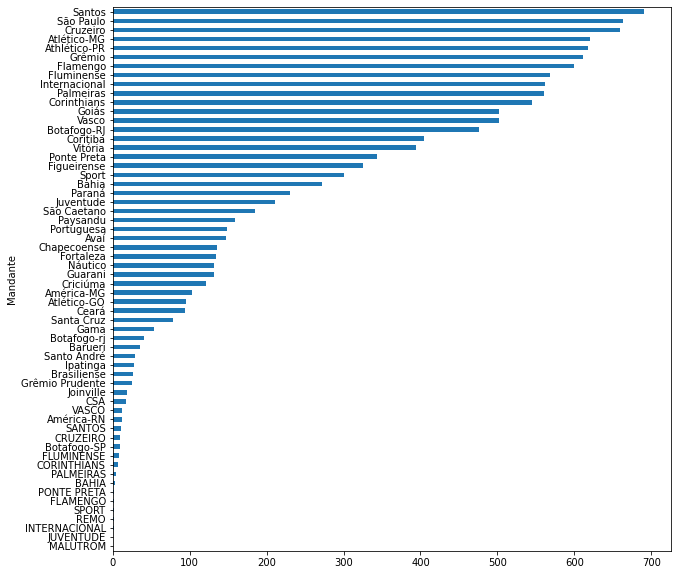

In [ ]:
times.groupby(['Mandante'])['MandanteGols'].sum().sort_values().plot(kind='barh',figsize=(10,10))

Tratando Alguns Nomes de times que estavam em caixa alta, como podemos ver no gráfica acima para não haver divergencias nas contagens e considerações.

In [ ]:
def corrigir_nomes(nome):
    nome = nome.replace('PALMEIRAS', 'Palmeiras').replace('CRUZEIRO', 'Cruzeiro').replace('VASCO', 'Vasco').replace('SANTOS', 'Santos').replace('CORINTHIANS','Corinthians').replace('BAHIA','Bahia').replace('PONTE PRETA','Ponte Preta').replace('FLAMENGO','Flamengo').replace('SPORT','Sport').replace('REMO','Remo').replace('INTERNACIONAL','Internacional').replace('JUVENTUDE','Juventude').replace('FLUMINENSE','Fluminense')
    return nome
times['Mandante'] = times['Mandante'].apply(corrigir_nomes)
times['Visitante'] = times['Visitante'].apply(corrigir_nomes)

#### Plotando indicadores  para análise exploratória

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1605: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  color=self.colors, align="center", **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1605: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  color=self.colors, align="center", **kws)


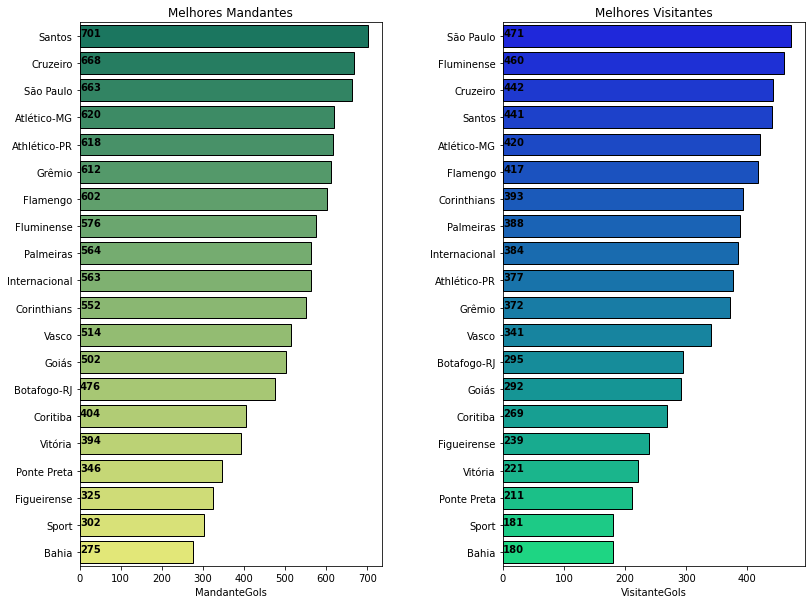

In [ ]:
mandantes = times.groupby("Mandante")["MandanteGols"].sum().reset_index()
visitantes = times.groupby("Visitante")["VisitanteGols"].sum().reset_index()
mandantes = mandantes.sort_values(by="MandanteGols",ascending= False)
visitantes = visitantes.sort_values(by="VisitanteGols",ascending= False)
plt.figure(figsize=(13,10))
plt.subplot(121)
ax = sns.barplot(y="Mandante",x="MandanteGols",
                 data=mandantes[:20],palette="summer",
                 linewidth = 1,edgecolor = "k"*20)
plt.ylabel('')
plt.title("Melhores Mandantes")
for i,j in enumerate(mandantes['MandanteGols'][:20]):
    ax.text(.7,i,j,weight = "bold")
plt.subplot(122)
ax = sns.barplot(y="Visitante",x="VisitanteGols",
                 data=visitantes[:20],palette="winter",
                linewidth = 1,edgecolor = "k"*20)
plt.ylabel("")
plt.subplots_adjust(wspace = .4)
plt.title("Melhores Visitantes")
for i,j in enumerate(visitantes['VisitanteGols'][:20]):
    ax.text(.7,i,j,weight = "bold")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1605: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  color=self.colors, align="center", **kws)


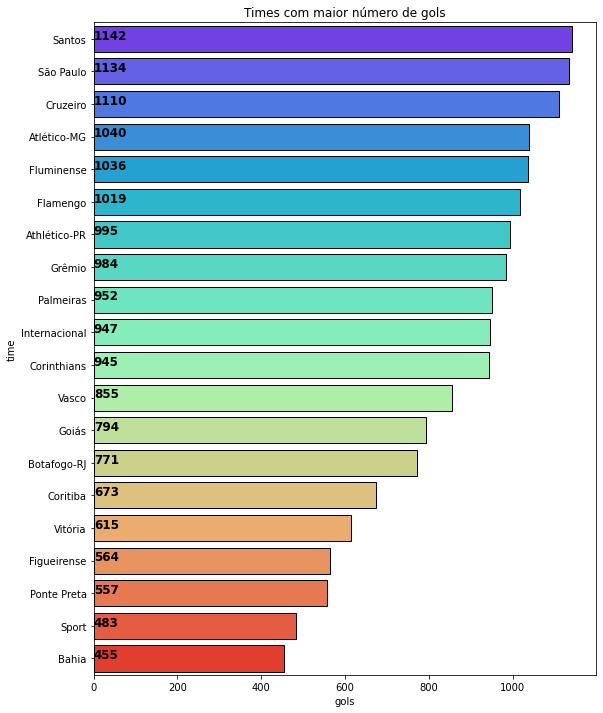

In [ ]:
x = mandantes
x = x.rename(columns={'Mandante':"time", 'MandanteGols':"gols"})
y = visitantes
y = y.rename(columns={'Visitante':"time", 'VisitanteGols':"gols"})
gols = pd.concat([x,y])
gols = gols.groupby("time")["gols"].sum().reset_index().sort_values(by = "gols",ascending = False)
plt.figure(figsize=(9,12))
ax = sns.barplot(x="gols",y="time",
                 data=gols[:20],palette="rainbow",
                linewidth = 1,edgecolor = "k"*30)
for i,j in enumerate(gols["gols"][:20]):
    ax.text(.3,i,j,weight="bold",color = "k",fontsize =12)
plt.title("Times com maior número de gols")
plt.show()

#### Definindo colunas interessantes ao modelo

In [ ]:
entradas = ['Data','Mandante','Visitante','MandanteGols','VisitanteGols','Vencedor','Rodada']
df_entradas = times[entradas]

#### Transformando a coluna Data para datetime e criando uma coluna apenas com o ano 

In [ ]:
df_entradas['Data']= pd.to_datetime(df_entradas['Data'],format='%Y/%m/%d')
df_entradas['Ano'] = df_entradas['Data'].dt.year
df_entradas = df_entradas.drop_duplicates()
df_entradas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7939 entries, 0 to 7938
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Data           7939 non-null   datetime64[ns]
 1   Mandante       7939 non-null   object        
 2   Visitante      7939 non-null   object        
 3   MandanteGols   7939 non-null   int64         
 4   VisitanteGols  7939 non-null   int64         
 5   Vencedor       7939 non-null   object        
 6   Rodada         7939 non-null   object        
 7   Ano            7939 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 558.2+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Plotando Total de rodadas por ano

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1605: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  color=self.colors, align="center", **kws)


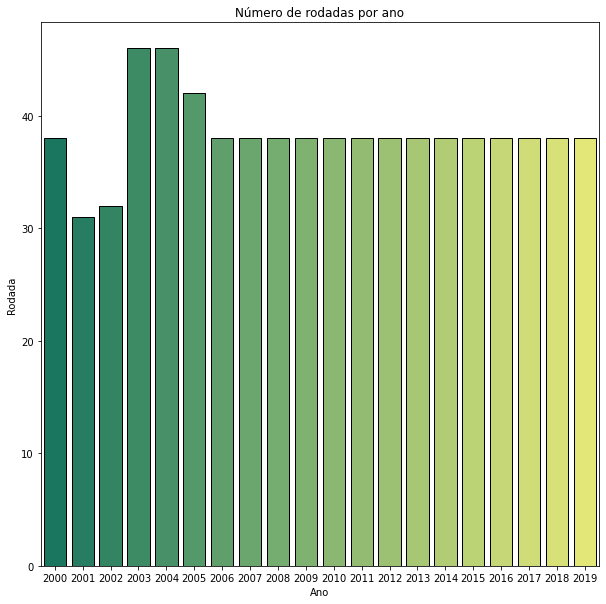

     Ano  Rodada
0   2000      38
1   2001      31
2   2002      32
3   2003      46
4   2004      46
5   2005      42
6   2006      38
7   2007      38
8   2008      38
9   2009      38
10  2010      38
11  2011      38
12  2012      38
13  2013      38
14  2014      38
15  2015      38
16  2016      38
17  2017      38
18  2018      38
19  2019      38


In [ ]:
rodadas = df_entradas.groupby(['Ano'])['Rodada'].nunique().reset_index()
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Ano",y="Rodada",
                 data=rodadas[:20],palette="summer", 
                linewidth = 1,edgecolor = "k"*20)

plt.title("Número de rodadas por ano")
plt.show()
print(rodadas)

## Engenharia de variáveis

#### Obtendo a média de gols feitos e sofridos por temporada 

In [ ]:
avgMandanteTemporada = df_entradas.groupby(['Mandante','Ano'])['MandanteGols'].expanding().mean().reset_index()
avgVisitanteTemporada = df_entradas.groupby(['Visitante','Ano'])['VisitanteGols'].expanding().mean().reset_index()

avgMandanteTemporada = avgMandanteTemporada.rename(columns={'MandanteGols':'avgGFMandante'})
avgVisitanteTemporada = avgVisitanteTemporada.rename(columns={'VisitanteGols':'avgGFVisitante'})


print(avgMandanteTemporada)
print(avgVisitanteTemporada)

        Mandante   Ano  level_2  avgGFMandante
0     América-MG  2000        7       0.000000
1     América-MG  2000       58       0.500000
2     América-MG  2000       69       0.333333
3     América-MG  2000       96       0.500000
4     América-MG  2000      105       1.400000
...          ...   ...      ...            ...
7934     Vitória  2018     7472       1.266667
7935     Vitória  2018     7480       1.187500
7936     Vitória  2018     7503       1.235294
7937     Vitória  2018     7519       1.222222
7938     Vitória  2018     7542       1.157895

[7939 rows x 4 columns]
       Visitante   Ano  level_2  avgGFVisitante
0     América-MG  2000       14        1.000000
1     América-MG  2000       55        0.500000
2     América-MG  2000      112        0.333333
3     América-MG  2000      130        0.500000
4     América-MG  2000      147        0.400000
...          ...   ...      ...             ...
7934     Vitória  2018     7493        0.750000
7935     Vitória  2018     

Resolvendo inconsistência nas médias, elas estavam sendo calculadas considerando os gols do jogo em questão 

In [ ]:
avgMandanteTemporada['avgGFMandante'] = avgMandanteTemporada.groupby(['Mandante','Ano'])['avgGFMandante'].shift(1)
avgVisitanteTemporada['avgGFVisitante'] = avgVisitanteTemporada.groupby(['Visitante','Ano'])['avgGFVisitante'].shift(1)

Colocando na ordem prevista no dataframe original

In [ ]:
avgMandanteTemporada = avgMandanteTemporada.sort_values(by='level_2').reset_index()
avgVisitanteTemporada = avgVisitanteTemporada.sort_values(by='level_2').reset_index()

In [ ]:
df_entradas['avgGFMandante'] = avgMandanteTemporada['avgGFMandante']
df_entradas['avgGFVisitante'] = avgVisitanteTemporada['avgGFVisitante']
df_entradas.tail()

,Data,Mandante,Visitante,MandanteGols,VisitanteGols,Vencedor,Rodada,Ano,avgGFMandante,avgGFVisitante
7934,2019-12-08,Goiás,Grêmio,3,2,Goiás,38ª Rodada,2019,1.555556,1.333333
7935,2019-12-08,Internacional,Atlético-MG,2,1,Internacional,38ª Rodada,2019,1.444444,0.888889
7936,2019-12-08,Cruzeiro,Palmeiras,0,2,Palmeiras,38ª Rodada,2019,0.722222,1.055556
7937,2019-12-08,Santos,Flamengo,4,0,Santos,38ª Rodada,2019,2.222222,1.666667
7938,2019-12-08,CSA,São Paulo,1,2,São Paulo,38ª Rodada,2019,0.888889,0.777778


In [ ]:
avgGSMandanteTemporada = df_entradas.groupby(['Ano','Mandante'])['VisitanteGols'].expanding().mean().reset_index()
avgGSVisitanteTemporada = df_entradas.groupby(['Ano','Visitante'])['MandanteGols'].expanding().mean().reset_index()

avgGSMandanteTemporada = avgGSMandanteTemporada.rename(columns={'VisitanteGols':'avgGSMandante'})
avgGSVisitanteTemporada = avgGSVisitanteTemporada.rename(columns={'MandanteGols':'avgGSVisitante'})

avgGSMandanteTemporada = avgGSMandanteTemporada.drop_duplicates()
avgGSVisitanteTemporada = avgGSVisitanteTemporada.drop_duplicates()


print(avgGSMandanteTemporada)
print(avgGSVisitanteTemporada)

       Ano    Mandante  level_2  avgGSMandante
0     2000  América-MG        7       1.000000
1     2000  América-MG       58       1.000000
2     2000  América-MG       69       0.666667
3     2000  América-MG       96       0.500000
4     2000  América-MG      105       0.800000
...    ...         ...      ...            ...
7934  2019       Vasco     7843       1.200000
7935  2019       Vasco     7863       1.250000
7936  2019       Vasco     7889       1.235294
7937  2019       Vasco     7918       1.166667
7938  2019       Vasco     7931       1.157895

[7939 rows x 4 columns]
       Ano   Visitante  level_2  avgGSVisitante
0     2000  América-MG       14        3.000000
1     2000  América-MG       55        3.000000
2     2000  América-MG      112        2.666667
3     2000  América-MG      130        2.500000
4     2000  América-MG      147        2.800000
...    ...         ...      ...             ...
7934  2019       Vasco     7850        1.133333
7935  2019       Vasco     

In [ ]:
avgGSMandanteTemporada['avgGSMandante'] = avgGSMandanteTemporada.groupby(['Mandante','Ano'])['avgGSMandante'].shift(1)
avgGSVisitanteTemporada['avgGSVisitante'] = avgGSVisitanteTemporada.groupby(['Visitante','Ano'])['avgGSVisitante'].shift(1)

In [ ]:
avgGSMandanteTemporada = avgGSMandanteTemporada.sort_values(by='level_2').reset_index()
avgGSVisitanteTemporada = avgGSVisitanteTemporada.sort_values(by='level_2').reset_index()

Verificando distribuição de frequencia dos dados 



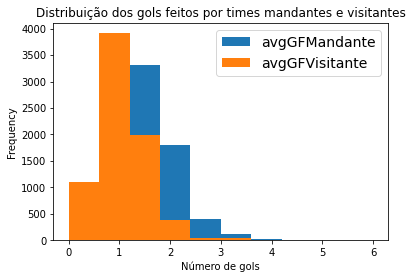

In [ ]:
df_entradas.avgGFMandante.plot(kind='hist')
df_entradas.avgGFVisitante.plot(kind='hist')
plt.title("Distribuição dos gols feitos por times mandantes e visitantes")
plt.xlabel('Número de gols')
plt.legend(loc = "best" , prop = {"size" : 14})


In [ ]:
df_entradas['avgGSMandante'] = avgGSMandanteTemporada['avgGSMandante']
df_entradas['avgGSVisitante'] = avgGSVisitanteTemporada['avgGSVisitante']
df_entradas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7939 entries, 0 to 7938
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data            7939 non-null   datetime64[ns]
 1   Mandante        7939 non-null   object        
 2   Visitante       7939 non-null   object        
 3   MandanteGols    7939 non-null   int64         
 4   VisitanteGols   7939 non-null   int64         
 5   Vencedor        7939 non-null   object        
 6   Rodada          7939 non-null   object        
 7   Ano             7939 non-null   int64         
 8   avgGFMandante   7506 non-null   float64       
 9   avgGFVisitante  7501 non-null   float64       
 10  avgGSMandante   7506 non-null   float64       
 11  avgGSVisitante  7501 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 806.3+ KB


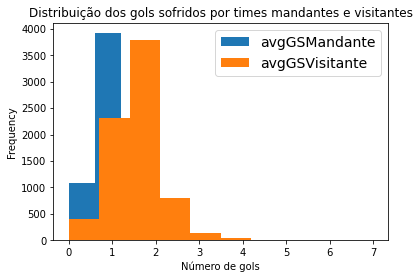

In [ ]:
df_entradas.avgGSMandante.plot(kind='hist')
df_entradas.avgGSVisitante.plot(kind='hist')
plt.title("Distribuição dos gols sofridos por times mandantes e visitantes")
plt.xlabel('Número de gols')
plt.legend(loc = "best" , prop = {"size" : 14})

#### Obtendo o Total de vitórias 
> Verifiquei que essa feature  não influencia positivamente o modelo.

In [ ]:
nVitoriasM = df_entradas.loc[df_entradas['Vencedor'] == df_entradas['Mandante']]
nVitoriasM = nVitoriasM.groupby(['Ano'])['Vencedor'].value_counts().to_frame(name='nVitoriasM')
nVitoriasM = nVitoriasM.reset_index(level=['Ano','Vencedor'])
print(nVitoriasM)


      Ano     Vencedor  nVitoriasM
0    2000   Fluminense           9
1    2000  Ponte Preta           9
2    2000        Bahia           8
3    2000       Grêmio           8
4    2000   Portuguesa           8
..    ...          ...         ...
426  2019          CSA           6
427  2019   Fluminense           6
428  2019     Cruzeiro           5
429  2019  Chapecoense           4
430  2019         Avaí           1

[431 rows x 3 columns]


In [ ]:
nVitoriasV = df_entradas.loc[df_entradas['Vencedor'] == df_entradas['Visitante']]
nVitoriasV = nVitoriasV.groupby(['Ano'])['Vencedor'].value_counts().to_frame(name='nVitoriasV')
nVitoriasV = nVitoriasV.reset_index(level=['Ano','Vencedor'])
print(nVitoriasV)

      Ano      Vencedor  nVitoriasV
0    2000     Palmeiras           6
1    2000  Athlético-PR           5
2    2000      Cruzeiro           5
3    2000         Goiás           4
4    2000        Grêmio           4
..    ...           ...         ...
423  2019   Chapecoense           3
424  2019          Avaí           2
425  2019           CSA           2
426  2019         Ceará           2
427  2019      Cruzeiro           2

[428 rows x 3 columns]


#### Obetendo Total de gols marcados nos últimos 3 jogos.

In [ ]:
# Total de gols marcados útimos 3 jogos Mandante
df_entradas['nGF_U3_Mandante'] = (df_entradas.groupby(['Ano','Mandante'])['MandanteGols'].shift(1) + 
df_entradas.groupby(['Ano','Mandante'])['MandanteGols'].shift(2) +
df_entradas.groupby(['Ano','Mandante'])['MandanteGols'].shift(3)
) 

# Total dos gols marcados útimos 3 jogos Visitante
df_entradas['nGF_U3_Visitante'] = (df_entradas.groupby(['Ano','Visitante'])['VisitanteGols'].shift(1) + 
df_entradas.groupby(['Ano','Visitante'])['VisitanteGols'].shift(2) +
df_entradas.groupby(['Ano','Visitante'])['VisitanteGols'].shift(3)
) 

# Total de  gols sofridos ultimos 3 jogos Mandante
df_entradas['nGS_U3_Mandante'] = (df_entradas.groupby(['Ano','Mandante'])['VisitanteGols'].shift(1) + 
df_entradas.groupby(['Ano','Mandante'])['VisitanteGols'].shift(2) +
df_entradas.groupby(['Ano','Mandante'])['VisitanteGols'].shift(3)
) 

# Total de  gols sofridos ultimos 3 jogos Visitante
df_entradas['nGS_U3_Visitante'] = (df_entradas.groupby(['Ano','Visitante'])['MandanteGols'].shift(1) + 
df_entradas.groupby(['Ano','Visitante'])['MandanteGols'].shift(2) +
df_entradas.groupby(['Ano','Visitante'])['MandanteGols'].shift(3) 
) 


df_entradas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7939 entries, 0 to 7938
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              7939 non-null   datetime64[ns]
 1   Mandante          7939 non-null   object        
 2   Visitante         7939 non-null   object        
 3   MandanteGols      7939 non-null   int64         
 4   VisitanteGols     7939 non-null   int64         
 5   Vencedor          7939 non-null   object        
 6   Rodada            7939 non-null   object        
 7   Ano               7939 non-null   int64         
 8   avgGFMandante     7506 non-null   float64       
 9   avgGFVisitante    7501 non-null   float64       
 10  avgGSMandante     7506 non-null   float64       
 11  avgGSVisitante    7501 non-null   float64       
 12  nGF_U3_Mandante   6645 non-null   float64       
 13  nGF_U3_Visitante  6640 non-null   float64       
 14  nGS_U3_Mandante   6645 n

#### Eliminando valores nulos 

In [ ]:
df_entradas = df_entradas.loc[df_entradas['nGF_U3_Mandante'].notnull()]
df_entradas = df_entradas.loc[df_entradas['nGF_U3_Visitante'].notnull()]


df_entradas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6557 entries, 59 to 7938
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              6557 non-null   datetime64[ns]
 1   Mandante          6557 non-null   object        
 2   Visitante         6557 non-null   object        
 3   MandanteGols      6557 non-null   int64         
 4   VisitanteGols     6557 non-null   int64         
 5   Vencedor          6557 non-null   object        
 6   Rodada            6557 non-null   object        
 7   Ano               6557 non-null   int64         
 8   avgGFMandante     6557 non-null   float64       
 9   avgGFVisitante    6557 non-null   float64       
 10  avgGSMandante     6557 non-null   float64       
 11  avgGSVisitante    6557 non-null   float64       
 12  nGF_U3_Mandante   6557 non-null   float64       
 13  nGF_U3_Visitante  6557 non-null   float64       
 14  nGS_U3_Mandante   6557 

#### Criando a variavel total de gols, e redividindo-a em intervalos.(obtendo saída)
> Para Total de gols menor ou igual a 3, {x = 0}

> Para Total de gols maior que 3, {x = 1}

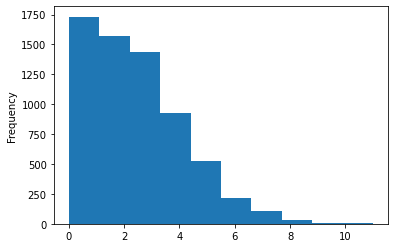

In [ ]:
df_entradas['total_gols'] = df_entradas['MandanteGols'] + df_entradas['VisitanteGols']
df_entradas.total_gols.plot(kind='hist')

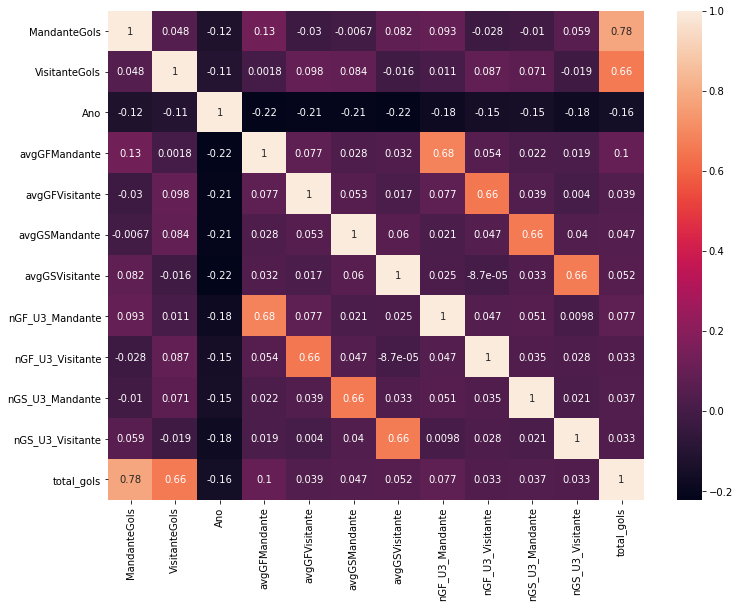

In [ ]:
#matriz de correlação plotada
plt.figure(figsize=(12,9))
matriz_correlacao=df_entradas.corr()
sns.heatmap(matriz_correlacao, annot=True)
plt.show()

In [ ]:
# dividindo  em intervalos 
df_entradas['faixa_degols'] = df_entradas['total_gols'].apply(lambda x: 0 if x<=3 else 1)
df_entradas['faixa_degols'].value_counts()

                                                          

0    4738
1    1819
Name: faixa_degols, dtype: int64

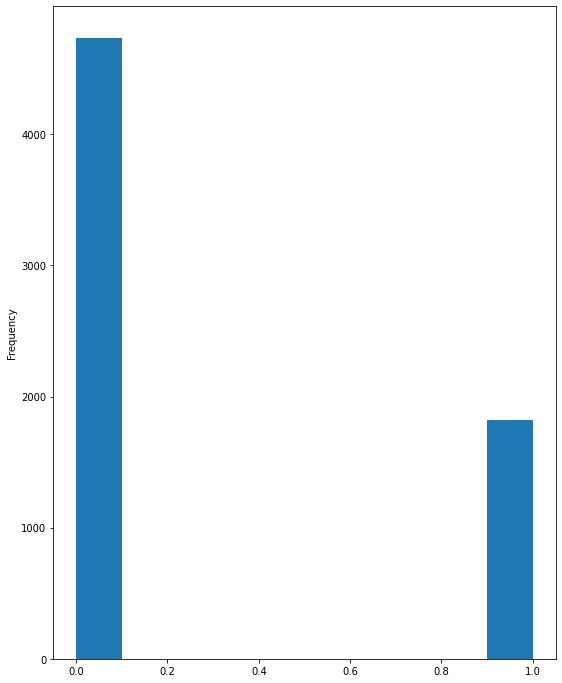

In [ ]:
df_entradas.faixa_degols.plot(kind='hist',figsize =(9,12))


Text(0.5, 1.0, 'Distribuição de Frequências Normal')

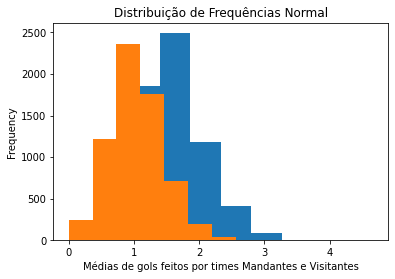

In [ ]:
df_entradas.avgGFMandante.plot(kind='hist')
df_entradas.avgGFVisitante.plot(kind='hist')
plt.xlabel('Médias de gols feitos por times Mandantes e Visitantes')
plt.title('Distribuição de Frequências Normal')

In [ ]:
df_entradas.describe()

,MandanteGols,VisitanteGols,Ano,avgGFMandante,avgGFVisitante,avgGSMandante,avgGSVisitante,nGF_U3_Mandante,nGF_U3_Visitante,nGS_U3_Mandante,nGS_U3_Visitante,total_gols,faixa_degols
count,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000
mean,1.605460,1.056581,2009.377307,1.576581,1.043089,1.041081,1.575870,4.770779,3.152356,3.143816,4.763001,2.662041,0.277413
std,1.250523,1.039343,5.679037,0.494775,0.413951,0.394070,0.483027,2.267380,1.908316,1.869825,2.221343,1.664101,0.447756
min,0.000000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2004.000000,1.250000,0.750000,0.764706,1.250000,3.000000,2.000000,2.000000,3.000000,1.000000,0.000000
50%,1.000000,1.000000,2009.000000,1.555556,1.000000,1.000000,1.571429,5.000000,3.000000,3.000000,5.000000,2.000000,0.000000
75%,2.000000,2.000000,2014.000000,1.875000,1.285714,1.285714,1.857143,6.000000,4.000000,4.000000,6.000000,4.000000,1.000000
max,7.000000,7.000000,2019.000000,4.666667,3.666667,2.750000,4.333333,15.000000,15.000000,12.000000,14.000000,11.000000,1.000000


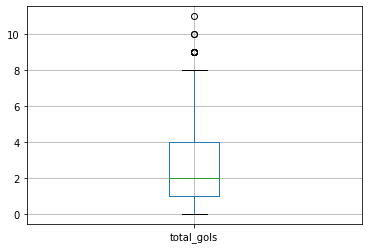

In [ ]:
df_entradas.boxplot(['total_gols'])

#### Dividindo os dados para entrada 'X' e saída 'y'

In [ ]:
X = df_entradas[['avgGFMandante','avgGFVisitante','avgGSMandante','avgGSVisitante','nGF_U3_Mandante','nGS_U3_Mandante','nGF_U3_Visitante','nGS_U3_Visitante','Ano'
                  ]]
y = df_entradas['faixa_degols']

#### Tratando desbalanceamento 

Undersampling

In [ ]:
from imblearn.under_sampling import NearMiss

nr = NearMiss()
X, y = nr.fit_sample(X, y)
np.bincount(y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

array([1819, 1819])

Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
np.bincount(y)

array([1819, 1819])

#### Efetuando normalização dos dados
é possível utilizar uma das técnicas de normalização 

Min-Max

In [ ]:

#importando o preprocessamento com o MinMax
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_escaler = sc_X.fit_transform(X)


Scale

In [ ]:
from sklearn.preprocessing import scale
X_escaler = scale(X)

#### Dividindo dados para treino e teste (Validação cruzada)

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_escaler, y, test_size=0.3, random_state=0)



#### Resultados Para Regressão Logistica 

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("Acurácia para a classificação :  ",accuracy_score(y_pred,y_test))
print(cross_val_score(classifier, X_test, y_test,cv=5))

Acurácia para a classificação :   0.5714285714285714
[0.59360731 0.56164384 0.60550459 0.58715596 0.56880734]


#### Resultados para KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=3)


In [ ]:
clf_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred_KNN = clf_KNN.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Acurácia para a classificação utilizando o KNN:  ",accuracy_score(y_pred_KNN,y_test))
print(cross_val_score(clf_KNN, X_test, y_test,cv=5))

Acurácia para a classificação utilizando o KNN:   0.5741758241758241
[0.55251142 0.58447489 0.57798165 0.60091743 0.55045872]


In [ ]:
print("O valor de f1-score para a árvore de decisão é:\n ",classification_report(y_test,y_pred_KNN))

O valor de f1-score para a árvore de decisão é:
                precision    recall  f1-score   support

           0       0.57      0.70      0.63       558
           1       0.59      0.44      0.50       534

    accuracy                           0.57      1092
   macro avg       0.58      0.57      0.57      1092
weighted avg       0.58      0.57      0.57      1092



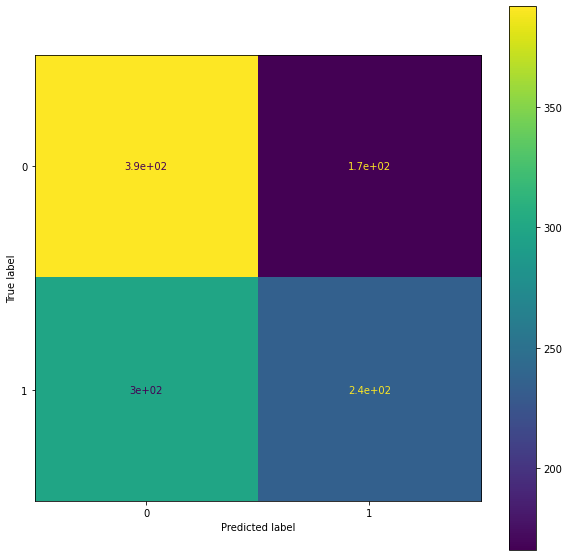

In [ ]:
plt.rcParams["figure.figsize"]=(10, 10)
plot_confusion_matrix(clf_KNN, X_test, y_test)
plt.show()

#### Resultados para Arvore de decisão 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
# Cria o objeto de classificação através do 
clf_arvore = DecisionTreeClassifier(criterion='entropy',max_depth=4 , max_features='auto')

# Realiza o treinamento do classificador
clf_arvore = clf_arvore.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred_arvore = clf_arvore.predict(X_test)



In [ ]:
from sklearn.metrics import classification_report
print("O valor de f1-score para a árvore de decisão é:\n ",classification_report(y_test,y_pred_arvore))
print(cross_val_score(clf_arvore, X_test, y_test,cv=5))

O valor de f1-score para a árvore de decisão é:
                precision    recall  f1-score   support

           0       0.60      0.91      0.73       558
           1       0.80      0.37      0.51       534

    accuracy                           0.65      1092
   macro avg       0.70      0.64      0.62      1092
weighted avg       0.70      0.65      0.62      1092

[0.61187215 0.64383562 0.61926606 0.55504587 0.64678899]


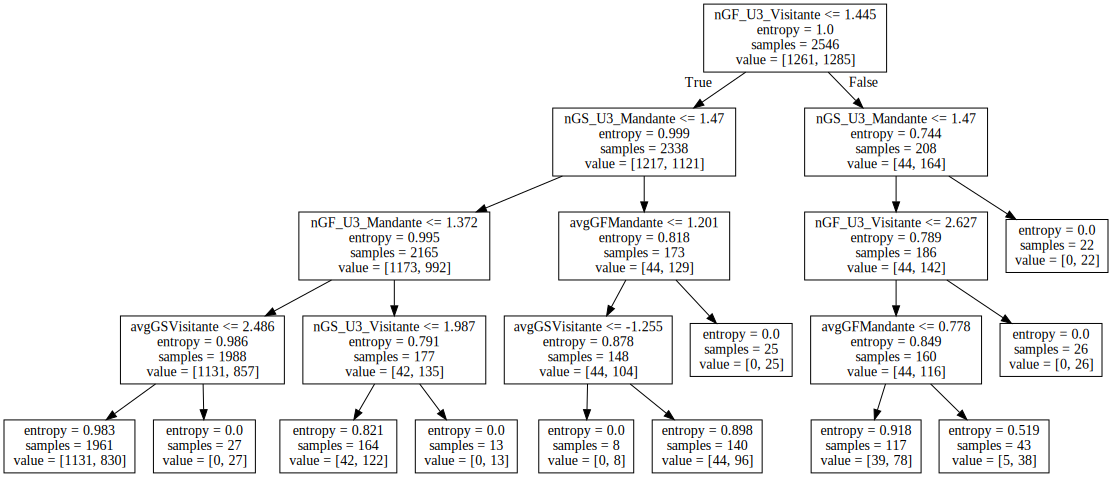

In [ ]:
arquivo = 'tree.dot'
features = ['avgGFMandante','avgGFVisitante','avgGSMandante','avgGSVisitante','nGF_U3_Mandante','nGS_U3_Mandante','nGF_U3_Visitante','nGS_U3_Visitante','Ano']
export_graphviz(clf_arvore, out_file = arquivo,  feature_names=features)
with open (arquivo) as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
!dot -Tpng tree.dot -o tree.png

#### Resultados para floresta randomica

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#define a floresta randomica
clf_floresta = RandomForestClassifier(max_depth=9, random_state=1,n_estimators=100,min_samples_split=2,max_features='auto',oob_score=True,criterion='gini')
clf_floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#Realiza a previsão de classificaçao 
y_pred_floresta = clf_floresta.predict(X_test)

In [ ]:
print("O valor de f1-score para a floresta randômica é:\n ",classification_report(y_test,y_pred_floresta))
score = (cross_val_score(clf_floresta, X_test, y_test,cv=5))
print(score.mean())

O valor de f1-score para a floresta randômica é:
                precision    recall  f1-score   support

           0       0.66      0.82      0.73       558
           1       0.75      0.57      0.64       534

    accuracy                           0.69      1092
   macro avg       0.70      0.69      0.69      1092
weighted avg       0.70      0.69      0.69      1092

0.6703238238867245


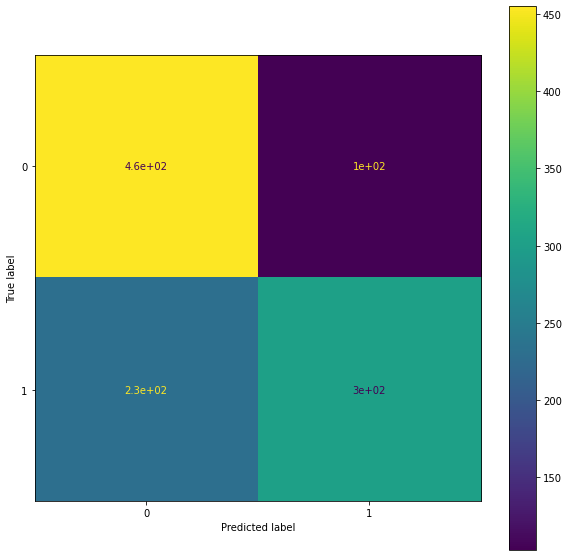

In [ ]:
from sklearn.metrics import plot_confusion_matrix
#realiza o plot da matriz de confusão
plt.rcParams["figure.figsize"]=(10, 10)
plot_confusion_matrix(clf_floresta, X_test, y_test)
plt.show()

#### Resultados para MLP

In [ ]:
#MLP como classificador
from sklearn.neural_network import MLPClassifier
#define a configuração da rede
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(8, 8), random_state=1)

#realiza o fit do modelo
clf_mlp.fit(X_train,y_train)


#realiza a previsão
y_pred_mlp=clf_mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print("O valor de f1-score para MLP é:\n ",classification_report(y_test,y_pred_mlp))
print(cross_val_score(clf_mlp, X_train, y_train,cv=5))

O valor de f1-score para MLP é:
                precision    recall  f1-score   support

           0       0.65      0.72      0.68       558
           1       0.67      0.59      0.63       534

    accuracy                           0.66      1092
   macro avg       0.66      0.65      0.65      1092
weighted avg       0.66      0.66      0.65      1092



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.63333333 0.64243615 0.65422397 0.66208251 0.64636542]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


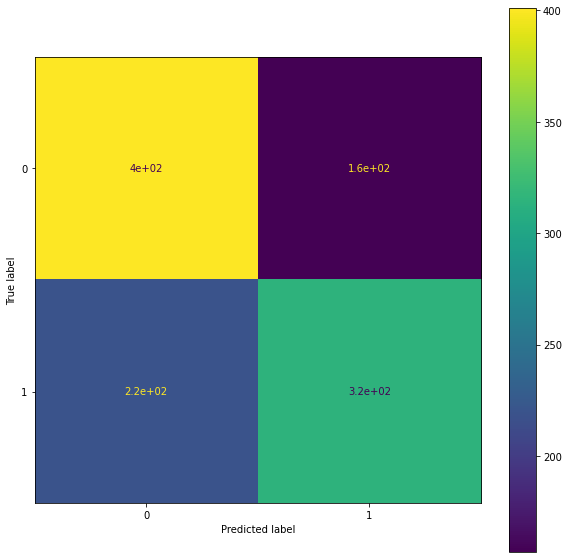

In [ ]:

#realiza o plot da matriz de confusão
plt.rcParams["figure.figsize"]=(10, 10)
plot_confusion_matrix(clf_mlp, X_test, y_test)
plt.show()

#### Resultados para Naive Bayes


In [ ]:

from sklearn.naive_bayes import GaussianNB
#define a configuração da rede
clf_naive = GaussianNB()

#realiza o fit do modelo
clf_naive.fit(X_train,y_train)


#realiza a previsão
y_pred_naive=clf_naive.predict(X_test)

print("O valor de f1-score para Naive Bayes é:\n ",classification_report(y_test,y_pred_naive))
print(cross_val_score(clf_naive, X_test , y_test, cv=5))

O valor de f1-score para Naive Bayes é:
                precision    recall  f1-score   support

           0       0.66      0.81      0.73       558
           1       0.74      0.57      0.64       534

    accuracy                           0.69      1092
   macro avg       0.70      0.69      0.68      1092
weighted avg       0.70      0.69      0.68      1092

[0.68949772 0.6347032  0.71100917 0.66055046 0.70183486]


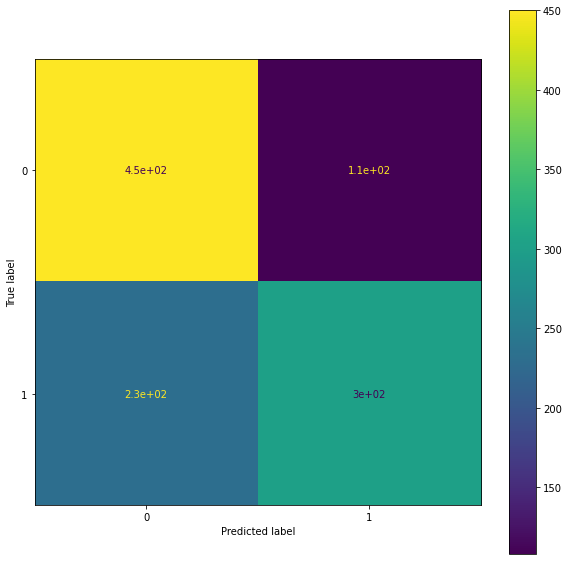

In [ ]:
plt.rcParams["figure.figsize"]=(10, 10)
plot_confusion_matrix(clf_naive, X_test, y_test)
plt.show()

#### Resultados para ExtraTrees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

X_escaler, y = make_classification(n_features=8, random_state=0,n_classes=2,n_samples=1000)
#define a configuração da rede
clf_extra_tree = ExtraTreesClassifier(criterion='entropy',max_depth=9,max_features='auto',n_estimators=100)

#realiza o fit do modelo
clf_extra_tree.fit(X_train,y_train)


#realiza a previsão
y_pred_extra_tree = clf_extra_tree.predict(X_test)

print("O valor de f1-score para Naive Bayes é:\n ",classification_report(y_test,y_pred_extra_tree))

O valor de f1-score para Naive Bayes é:
                precision    recall  f1-score   support

           0       0.66      0.81      0.73       558
           1       0.74      0.56      0.64       534

    accuracy                           0.69      1092
   macro avg       0.70      0.69      0.69      1092
weighted avg       0.70      0.69      0.69      1092



#### Resultado para GradientBoost




In [ ]:

from sklearn.ensemble import GradientBoostingClassifier



clf_gradient = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1,max_depth=1 ,max_features='auto',subsample = 1, loss='exponential').fit(X_train, y_train)

y_pred_gradient = clf_gradient.predict(X_test)

print("O valor de f1-score para Naive Bayes é:\n ",classification_report(y_test,y_pred_gradient))
clf_gradient.score(X_test, y_test)
print(clf_gradient)

O valor de f1-score para Naive Bayes é:
                precision    recall  f1-score   support

           0       0.67      0.80      0.73       558
           1       0.74      0.58      0.65       534

    accuracy                           0.69      1092
   macro avg       0.70      0.69      0.69      1092
weighted avg       0.70      0.69      0.69      1092

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='exponential', max_depth=1,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1, tol=0.0001,
                           validation_

In [ ]:
##from sklearn.model_selection import RandomizedSearchCV

##param_grid = {'max_features' : ['auto'],
##              'max_depth' : [1],
##              'learning_rate' : [0.01,0.001,0.1,1,1.5],
  ##            'subsample' : [0.1,0.3,0.5,0.7,1],
    ##          'n_estimators' : [10,100,500,1000,3000],
      ##        'loss' : ['exponential']
        ##      }

##grid = RandomizedSearchCV(clf_gradient, param_distributions =param_grid, return_train_score = True)
##grid.fit(X_train,y_train)
##grid.cv_results_


{'mean_fit_time': array([1.50314646, 0.71126003, 4.42159505, 1.43559175, 1.12321091,
        0.84944124, 2.53928494, 0.08561211, 0.66930633, 0.13262939]),
 'mean_score_time': array([0.00307665, 0.00212355, 0.0098052 , 0.00387363, 0.00338378,
        0.00407863, 0.00988989, 0.00095191, 0.00233169, 0.00089469]),
 'mean_test_score': array([0.63000732, 0.67596132, 0.67478408, 0.65396587, 0.63864864,
        0.67439578, 0.58642398, 0.56835471, 0.68107169, 0.67478639]),
 'mean_train_score': array([0.65102205, 0.70316242, 0.70306375, 0.74813485, 0.653182  ,
        0.69049538, 0.66309811, 0.57747419, 0.70895559, 0.69137899]),
 'param_learning_rate': masked_array(data=[0.001, 0.1, 0.01, 1, 0.001, 0.01, 1, 0.001, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_loss': masked_array(data=['exponential', 'exponential', 'exponential',
                    'exponential'

In [ ]:
best_clf_gradient = grid.best_estimator_
y_best_pred_gradient = best_clf_gradient.predict(X_test)
print("O valor de f1-score para Naive Bayes é:\n ",classification_report(y_test,y_best_pred_gradient))
print(grid.best_estimator_)

O valor de f1-score para Naive Bayes é:
                precision    recall  f1-score   support

           0       0.67      0.79      0.73       558
           1       0.73      0.60      0.66       534

    accuracy                           0.70      1092
   macro avg       0.70      0.69      0.69      1092
weighted avg       0.70      0.70      0.69      1092

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='exponential', max_depth=1,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation

#### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification


clf_ada = AdaBoostClassifier(n_estimators=100, random_state=0,learning_rate=0.1, base_estimator=None)
clf_ada.fit(X_train, y_train)

y_pred_ada = clf_ada.predict(X_test)

print("O valor de f1-score para Naive Bayes é:\n ",classification_report(y_test,y_pred_ada))
print(clf_ada)

O valor de f1-score para Naive Bayes é:
                precision    recall  f1-score   support

           0       0.66      0.82      0.73       558
           1       0.75      0.56      0.64       534

    accuracy                           0.69      1092
   macro avg       0.70      0.69      0.68      1092
weighted avg       0.70      0.69      0.69      1092

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=0)


#### Resultados para Bagging 

In [ ]:
from sklearn.ensemble import BaggingClassifier

clf_bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=4), max_samples = 0.5, max_features = 0.5)
clf_bagging.fit(X_train, y_train)

y_pred_bagging = clf_bagging.predict(X_test)
print("O valor de f1-score para Naive Bayes é:\n ",classification_report(y_test,y_pred_bagging))

O valor de f1-score para Naive Bayes é:
                precision    recall  f1-score   support

           0       0.63      0.77      0.70       558
           1       0.69      0.54      0.60       534

    accuracy                           0.66      1092
   macro avg       0.66      0.65      0.65      1092
weighted avg       0.66      0.66      0.65      1092



#### Resultado para SVM 

In [ ]:
from sklearn.svm import SVC

clf_svm = SVC(kernel='rbf',gamma='auto',C=0.1)
clf_svm.fit(X_train,y_train)
y_pred_svm = clf_svm.predict(X_test)
print("O valor de f1-score para Naive Bayes é:\n ",classification_report(y_test,y_pred_svm))


O valor de f1-score para Naive Bayes é:
                precision    recall  f1-score   support

           0       0.68      0.79      0.73       558
           1       0.73      0.61      0.67       534

    accuracy                           0.70      1092
   macro avg       0.71      0.70      0.70      1092
weighted avg       0.71      0.70      0.70      1092



In [ ]:
##from sklearn.model_selection import GridSearchCV

##param_grid = {'C' : [0.1,1],
  ##            'kernel' : ['rbf'],
    ##          'gamma' : ['auto',0.01,0.1,1],
      ##        'decision_function_shape' : ['ovo','ovr']
        ##      }

##grid = GridSearchCV(clf_svm, param_grid=param_grid, return_train_score = True)
##grid.fit(X_train,y_train)
##rid.cv_results_


{'mean_fit_time': array([0.16045899, 0.1737062 , 0.15656013, 0.21261535, 0.15624185,
        0.1726387 , 0.15524855, 0.21280856, 0.15390573, 0.15736423,
        0.15350647, 0.22935238, 0.15362525, 0.15754266, 0.15271497,
        0.22914667]),
 'mean_score_time': array([0.02958326, 0.03214674, 0.02828293, 0.03466892, 0.02857366,
        0.03248672, 0.02861609, 0.03490477, 0.02549825, 0.0285202 ,
        0.02545447, 0.03404002, 0.02556782, 0.02855558, 0.02625413,
        0.03412323]),
 'mean_test_score': array([0.68381756, 0.61664163, 0.68421126, 0.50510651, 0.68381756,
        0.61664163, 0.68421126, 0.50510651, 0.68892792, 0.65946839,
        0.68932008, 0.62843946, 0.68892792, 0.65946839, 0.68932008,
        0.62843946]),
 'mean_train_score': array([0.70178737, 0.6200893 , 0.69952885, 0.50579336, 0.70178737,
        0.6200893 , 0.69952885, 0.50579336, 0.73723493, 0.66781227,
        0.73252129, 0.97289867, 0.73723493, 0.66781227, 0.73252129,
        0.97289867]),
 'param_C': masked_ar

In [ ]:
best_clf_svm = grid.best_estimator_
y_best_pred_svm = best_clf_svm.predict(X_test)
print("O valor de f1-score para Naive Bayes é:\n ",classification_report(y_test,y_best_pred_svm))
print(grid.best_estimator_)

O valor de f1-score para Naive Bayes é:
                precision    recall  f1-score   support

           0       0.67      0.80      0.73       558
           1       0.74      0.59      0.66       534

    accuracy                           0.70      1092
   macro avg       0.71      0.70      0.69      1092
weighted avg       0.70      0.70      0.69      1092

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


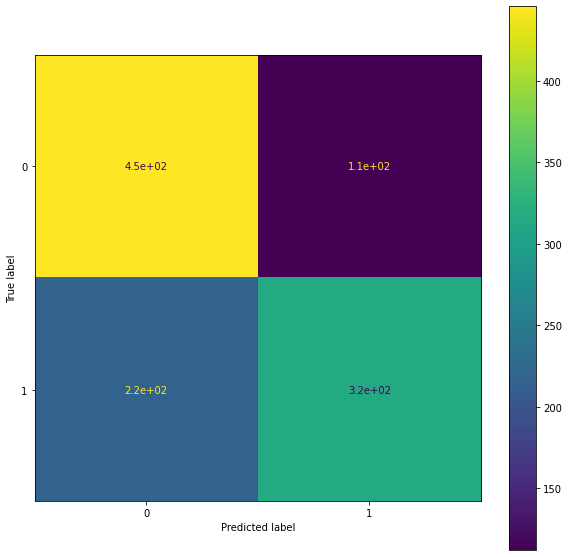

In [ ]:
plt.rcParams["figure.figsize"]=(10, 10)
plot_confusion_matrix(best_clf_svm, X_test, y_test)
plt.show()